In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [117]:

sample_submission_df = pd.read_csv("sample_submission.csv")
test_df = pd.read_csv("Test.csv")
train_df = pd.read_csv("Train.csv")

In [118]:
original_train_df = train_df.copy()
original_test_df = test_df.copy()


In [119]:
test_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [120]:
train_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [121]:
sample_submission_df

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A
...,...,...
2622,467954,A
2623,467958,A
2624,467960,A
2625,467961,A


In [122]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [123]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [124]:
categories = test_df['Profession'].unique()
print(categories)

['Engineer' 'Healthcare' nan 'Executive' 'Marketing' 'Doctor' 'Artist'
 'Lawyer' 'Entertainment' 'Homemaker']


Encoding using Dictionaries as the dataset is small.

In [125]:
# Defining replacement dictionaries for each column test_df
spending_score_dict = {'Low': 1, 'Average': 2, 'High': 3}
ever_married_dict = {'No': 0, 'Yes': 1}
graduated_dict = {'No': 0, 'Yes': 1}
gender_dict = {'Female': 0, 'Male': 1}
profession_dict = {'Engineer': 0, 'Healthcare': 1, 'Executive': 2, 'Marketing': 3, 'Doctor': 4, 'Artist': 5, 'Lawyer' :6,
                  'Entertainment': 7, 'Homemaker': 8}
replacement_dict = {
    'Cat_1': 1,
    'Cat_2': 2,
    'Cat_3': 3,
    'Cat_4': 4,
    'Cat_5': 5,
    'Cat_6': 6,
    'Cat_7': 7
}
# Applying the replacements
test_df['Spending_Score'] = test_df['Spending_Score'].replace(spending_score_dict)
test_df['Ever_Married'] = test_df['Ever_Married'].replace(ever_married_dict)
test_df['Graduated'] = test_df['Graduated'].replace(graduated_dict)
test_df['Gender'] = test_df['Gender'].replace(gender_dict)
test_df['Profession'] = test_df['Profession'].replace(profession_dict)
test_df['Var_1'] = test_df['Var_1'].replace(replacement_dict)

# Displaying the first few rows to verify the replacements
test_df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1.0,36,1.0,0.0,0.0,1,1.0,6.0
1,458994,1,1.0,37,1.0,1.0,8.0,2,4.0,6.0
2,458996,0,1.0,69,0.0,NaN,0.0,1,1.0,6.0
3,459000,1,1.0,59,0.0,2.0,11.0,3,2.0,6.0
4,459001,0,0.0,19,0.0,3.0,NaN,1,4.0,6.0


In [126]:
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1.0,36,1.0,0.0,0.0,1,1.0,6.0
1,458994,1,1.0,37,1.0,1.0,8.0,2,4.0,6.0
2,458996,0,1.0,69,0.0,NaN,0.0,1,1.0,6.0
3,459000,1,1.0,59,0.0,2.0,11.0,3,2.0,6.0
4,459001,0,0.0,19,0.0,3.0,NaN,1,4.0,6.0


In [127]:
# Defining replacement dictionaries for each column train_df
spending_score_dict = {'Low': 1, 'Average': 2, 'High': 3}
ever_married_dict = {'No': 0, 'Yes': 1}
graduated_dict = {'No': 0, 'Yes': 1}
gender_dict = {'Female': 0, 'Male': 1}
profession_dict = {'Engineer': 0, 'Healthcare': 1, 'Executive': 2, 'Marketing': 3, 'Doctor': 4, 'Artist': 5, 'Lawyer' :6,
                  'Entertainment': 7, 'Homemaker': 8}
replacement_dict = {
    'Cat_1': 1,
    'Cat_2': 2,
    'Cat_3': 3,
    'Cat_4': 4,
    'Cat_5': 5,
    'Cat_6': 6,
    'Cat_7': 7
}

# Applying the replacements
train_df['Spending_Score'] = train_df['Spending_Score'].replace(spending_score_dict)
train_df['Ever_Married'] = train_df['Ever_Married'].replace(ever_married_dict)
train_df['Graduated'] = train_df['Graduated'].replace(graduated_dict)
train_df['Gender'] = train_df['Gender'].replace(gender_dict)
train_df['Profession'] = train_df['Profession'].replace(profession_dict)
train_df['Var_1'] = train_df['Var_1'].replace(replacement_dict)

train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0.0,22,0.0,1.0,1.0,1,4.0,4.0,D
1,462643,0,1.0,38,1.0,0.0,NaN,2,3.0,4.0,A
2,466315,0,1.0,67,1.0,0.0,1.0,1,1.0,6.0,B
3,461735,1,1.0,67,1.0,6.0,0.0,3,2.0,6.0,B
4,462669,0,1.0,40,1.0,7.0,NaN,3,6.0,6.0,A


In [128]:
# Save the 'ID' columns from both datasets before removal
train_ids = train_df['ID'].copy()
test_ids = test_df['ID'].copy()

# Safely remove the 'ID' and 'Segmentation' columns from your datasets
train_df = train_df.drop(['ID', 'Segmentation'], axis=1)
test_df = test_df.drop('ID', axis=1)


In [129]:
train_df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [130]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer for df_train
knn_imputer = KNNImputer(n_neighbors=5)

numerical_cols = ['Ever_Married', 'Graduated', 'Profession','Work_Experience', 'Family_Size', 'Var_1']
data_knn_imputed_train = train_df.copy()
data_knn_imputed_train[numerical_cols] = knn_imputer.fit_transform(data_knn_imputed_train[numerical_cols])

# Check if any missing values remain
remaining_missing_values_train = data_knn_imputed_train.isnull().sum()

remaining_missing_values_train

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [131]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer for df_test
knn_imputer = KNNImputer(n_neighbors=5)

numerical_cols = ['Ever_Married', 'Graduated', 'Profession','Work_Experience', 'Family_Size', 'Var_1']
data_knn_imputed_test = test_df.copy()
data_knn_imputed_test[numerical_cols] = knn_imputer.fit_transform(data_knn_imputed_test[numerical_cols])

# Check if any missing values remain
remaining_missing_values_test = data_knn_imputed_test.isnull().sum()

remaining_missing_values_test

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [132]:
data_knn_imputed_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1.0,36,1.0,0.0,0.0,1,1.0,6.0
1,1,1.0,37,1.0,1.0,8.0,2,4.0,6.0
2,0,1.0,69,0.0,5.0,0.0,1,1.0,6.0
3,1,1.0,59,0.0,2.0,11.0,3,2.0,6.0
4,0,0.0,19,0.0,3.0,1.2,1,4.0,6.0


In [133]:
data_knn_imputed_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0.0,22,0.0,1.0,1.0,1,4.0,4.0
1,0,1.0,38,1.0,0.0,3.8,2,3.0,4.0
2,0,1.0,67,1.0,0.0,1.0,1,1.0,6.0
3,1,1.0,67,1.0,6.0,0.0,3,2.0,6.0
4,0,1.0,40,1.0,7.0,3.2,3,6.0,6.0


In [134]:
data_knn_imputed_test =data_knn_imputed_test.drop(['Gender','Ever_Married', 'Age', 'Graduated', 'Profession', 'Var_1'], axis=1)
data_knn_imputed_train = data_knn_imputed_train.drop(['Gender','Ever_Married', 'Age', 'Graduated', 'Profession', 'Var_1'],axis=1)

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Initializing the StandardScaler
scaler = StandardScaler()
scale = MinMaxScaler()
scal = RobustScaler()
# Scaling the features in the training dataset
train_df_scaled = data_knn_imputed_train.copy()
train_df_scaled = scale.fit_transform(data_knn_imputed_train)

# Scaling the features in the testing dataset using the same scaler
test_df_scaled = data_knn_imputed_test.copy()
test_df_scaled= scale.transform(data_knn_imputed_test)

In [136]:
train_df_scaled

array([[0.07142857, 0.        , 0.375     ],
       [0.27142857, 0.5       , 0.25      ],
       [0.07142857, 0.        , 0.        ],
       ...,
       [0.07142857, 0.        , 0.        ],
       [0.07142857, 0.        , 0.375     ],
       [0.        , 0.5       , 0.25      ]])

In [137]:
test_df_scaled

array([[0.        , 0.        , 0.        ],
       [0.57142857, 0.5       , 0.375     ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.41428571, 0.        , 0.125     ],
       [0.07142857, 1.        , 0.5       ],
       [0.64285714, 0.        , 0.25      ]])

In [138]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(train_df_scaled)

# Getting the cluster labels for each data point
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
train_df['Cluster'] = cluster_labels


In [139]:
from sklearn.metrics import silhouette_score

score = silhouette_score(train_df_scaled, cluster_labels)
print("Silhouette Score: ", score)


Silhouette Score:  0.5010927761650418


In [140]:

test_cluster_labels = kmeans.predict(test_df_scaled)
test_df['Cluster'] = test_cluster_labels
test_cluster_labels

array([1, 0, 1, ..., 0, 3, 0])

In [141]:
test_cluster_labels

array([1, 0, 1, ..., 0, 3, 0])

In [142]:
testing = pd.read_csv("test.csv")
testing = testing.dropna()
test_ids = testing.get('ID')
test_ids

0       458989
1       458994
3       459000
5       459003
6       459005
         ...  
2621    467950
2622    467954
2623    467958
2625    467961
2626    467968
Name: ID, Length: 2154, dtype: int64

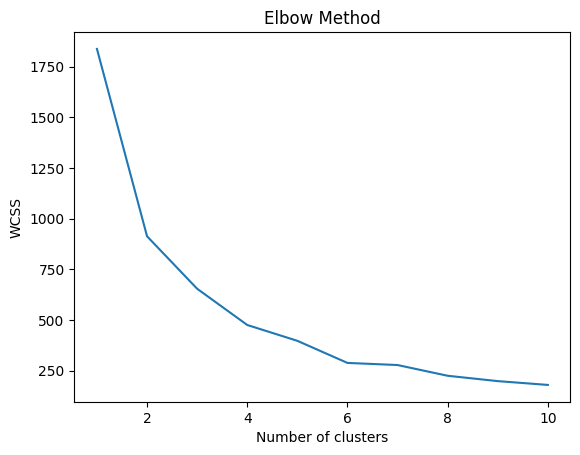

In [143]:
## elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train_df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [144]:

test_cluster_labels = kmeans.predict(test_df_scaled)


In [146]:
original_train_df['Cluster'] = cluster_labels


In [147]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(test_df_scaled)

cluster_labels_test = kmeans.labels_
centroids = kmeans.cluster_centers_
test_df['Cluster'] = cluster_labels_test
cluster_labels_test = kmeans.predict(test_df_scaled)


Unique cluster labels: [1 2 3 0]


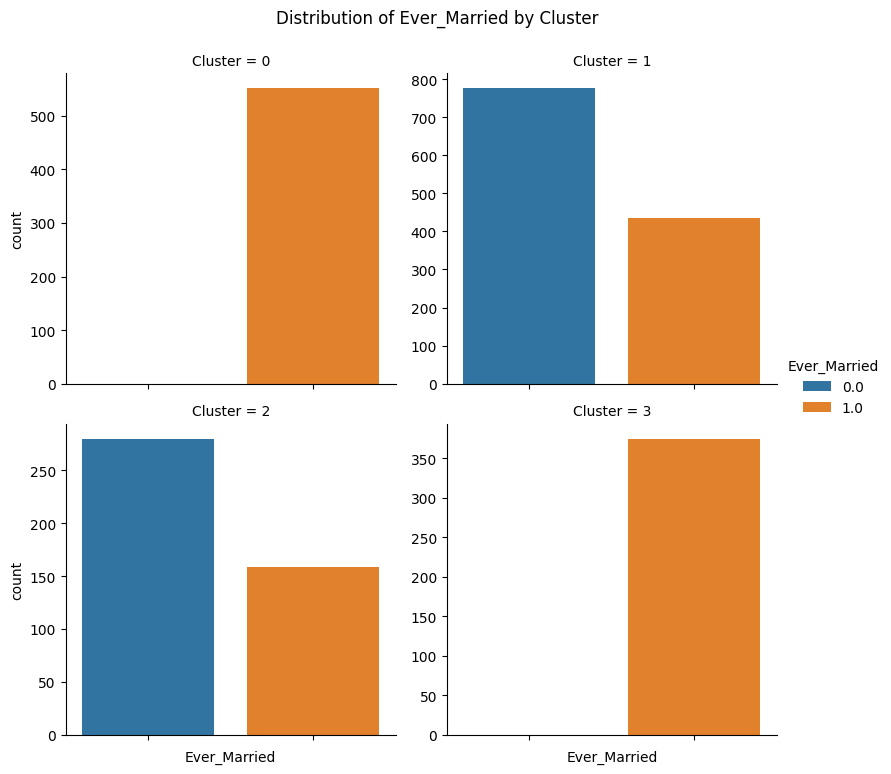

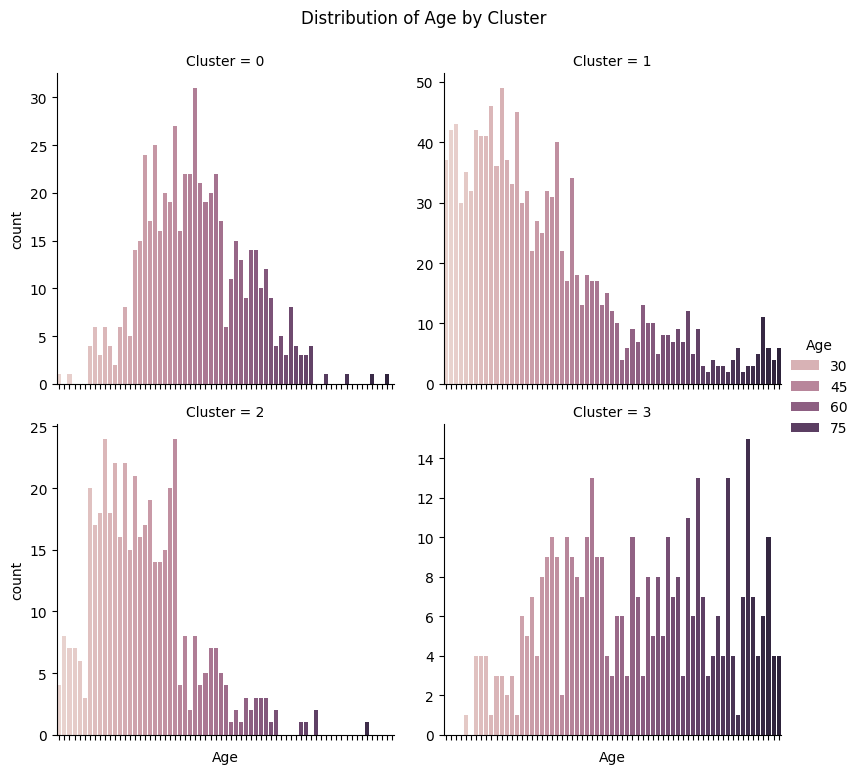

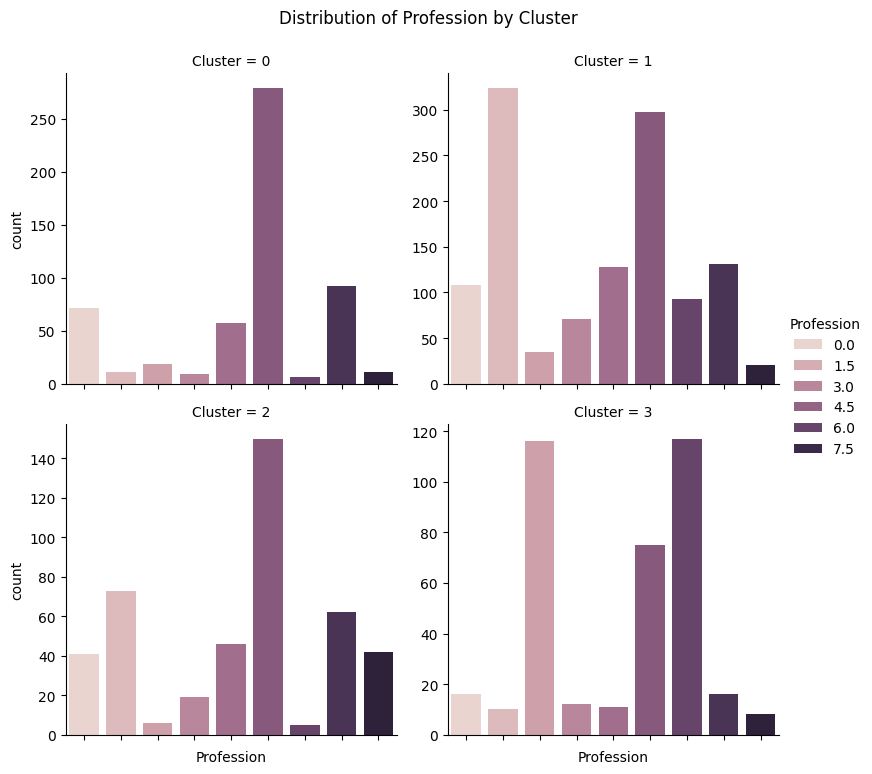

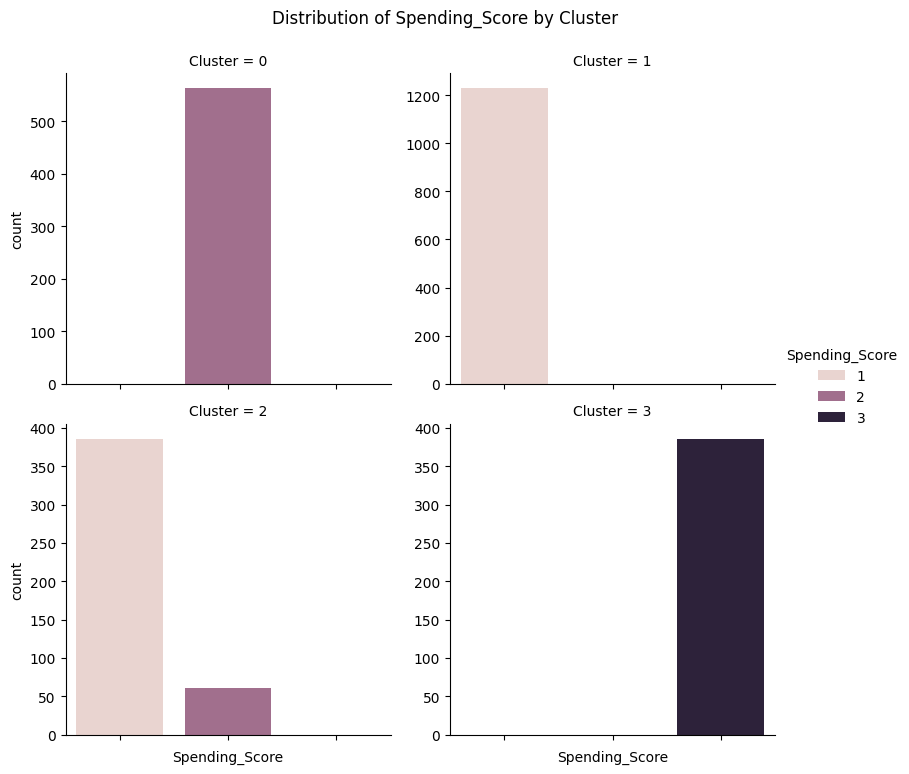

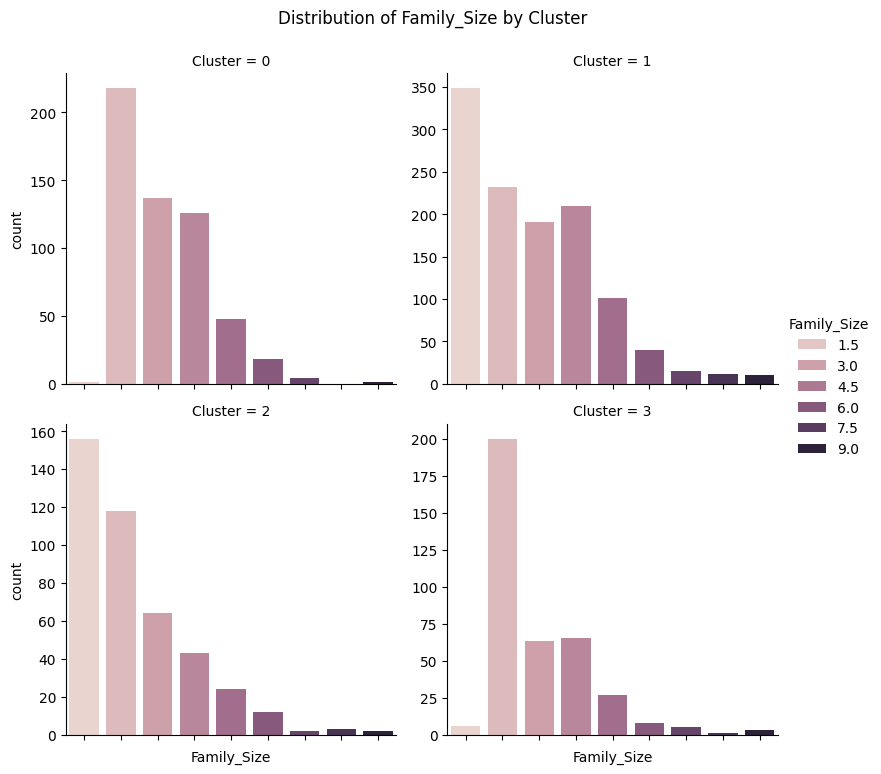

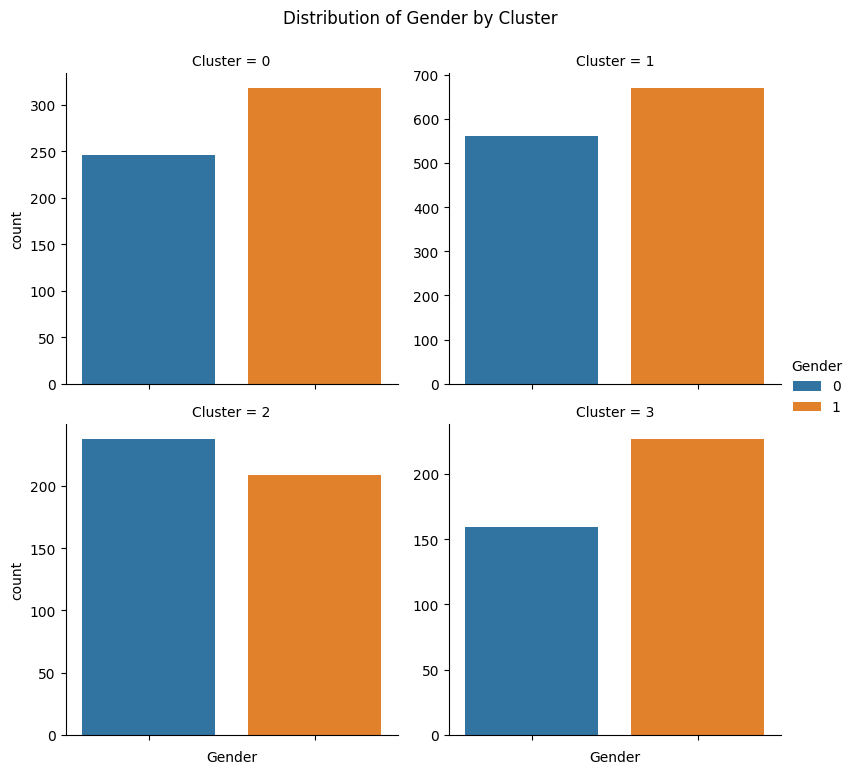

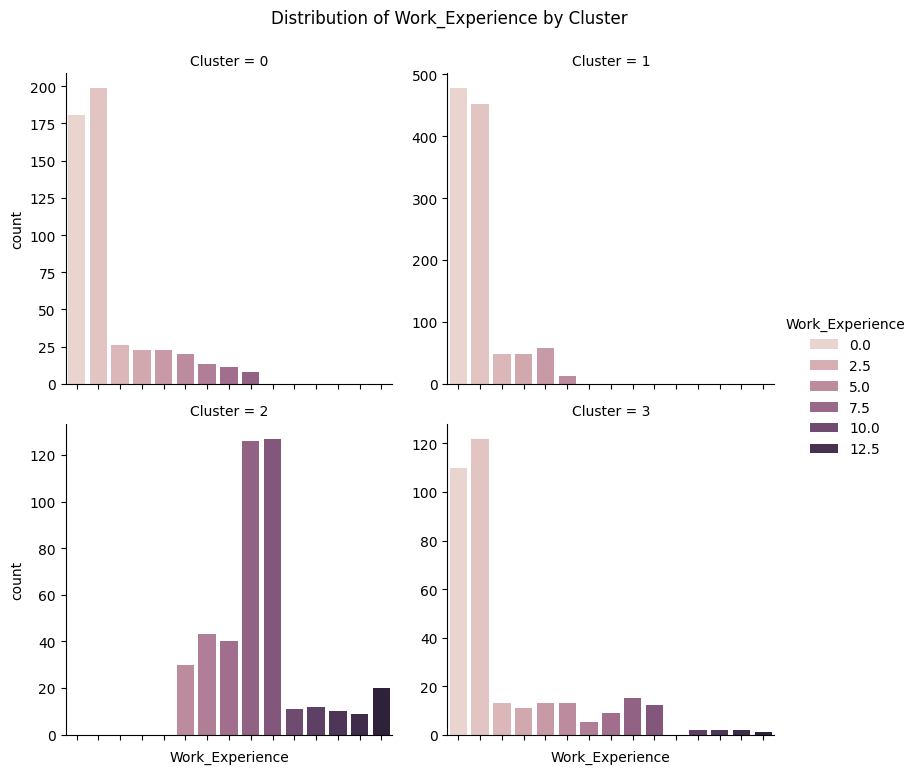

In [148]:
# Verify the unique cluster labels
unique_clusters = original_train_df['Cluster'].unique()
print("Unique cluster labels:", unique_clusters)

original_train_df = original_train_df[original_train_df['Cluster'].isin([0, 1, 2, 3])]

features_to_plot = ["Ever_Married", "Age", "Profession", "Spending_Score", "Family_Size", "Gender", "Work_Experience"]

for feature in features_to_plot:
    g = sns.catplot(x=feature, col="Cluster", col_wrap=2, hue= feature,
                    data=test_df, kind="count",
                    height=4, aspect=1, sharey=False)
    
    g.fig.subplots_adjust(top=0.9)  # Adjust the top of the subplots for the title
    g.fig.suptitle(f'Distribution of {feature} by Cluster')

    for ax in g.axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.show()



In [149]:
reverse_profession_dict = {v: k for k, v in profession_dict.items()}
reverse_spending_score_dict = {v: k for k, v in spending_score_dict.items()}

# Apply the reverse mappings to the test dataframe
test_df['Profession'] = test_df['Profession'].map(reverse_profession_dict)
test_df['Spending_Score'] = test_df['Spending_Score'].map(reverse_spending_score_dict)
# Repeat for other features


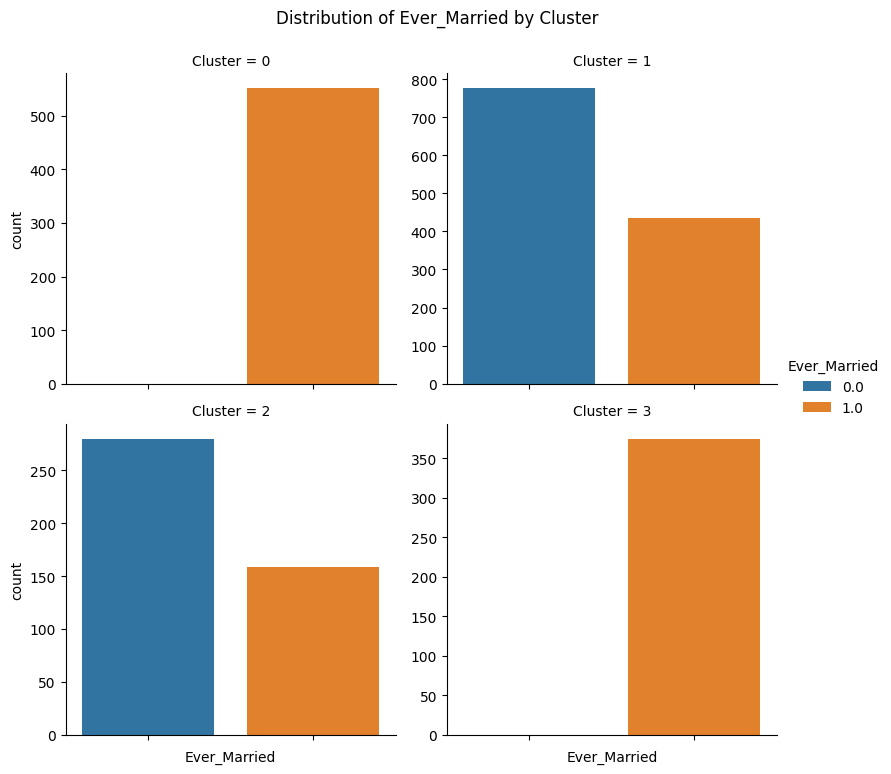

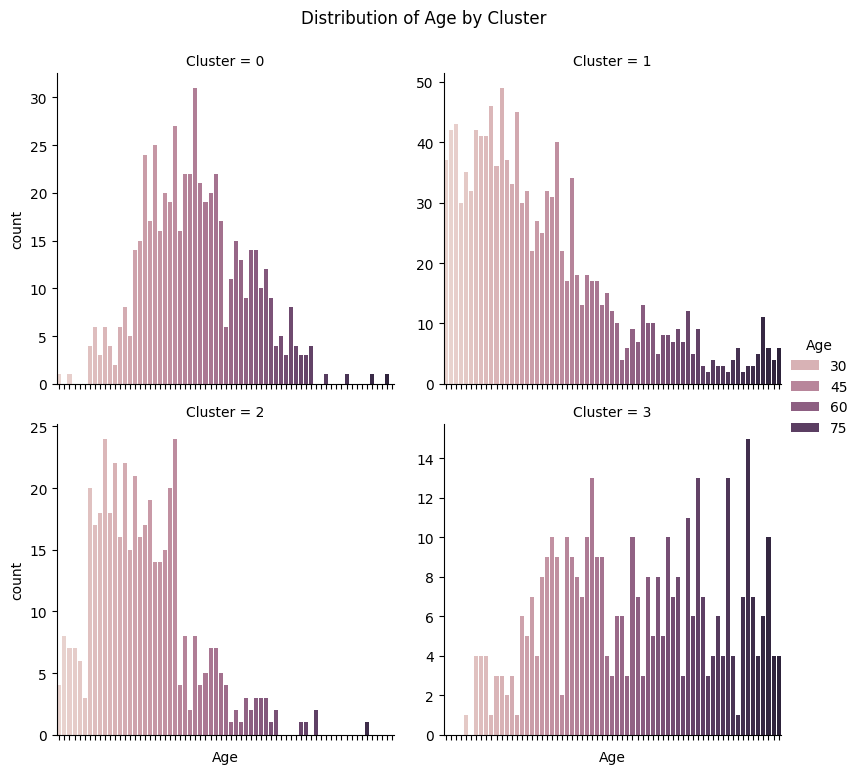

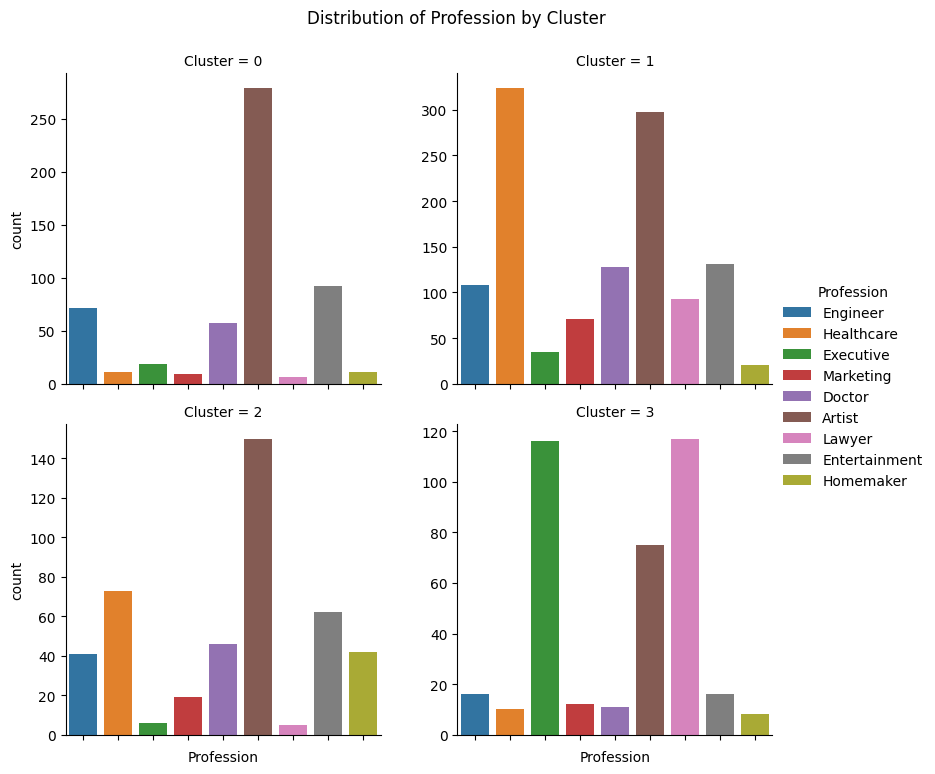

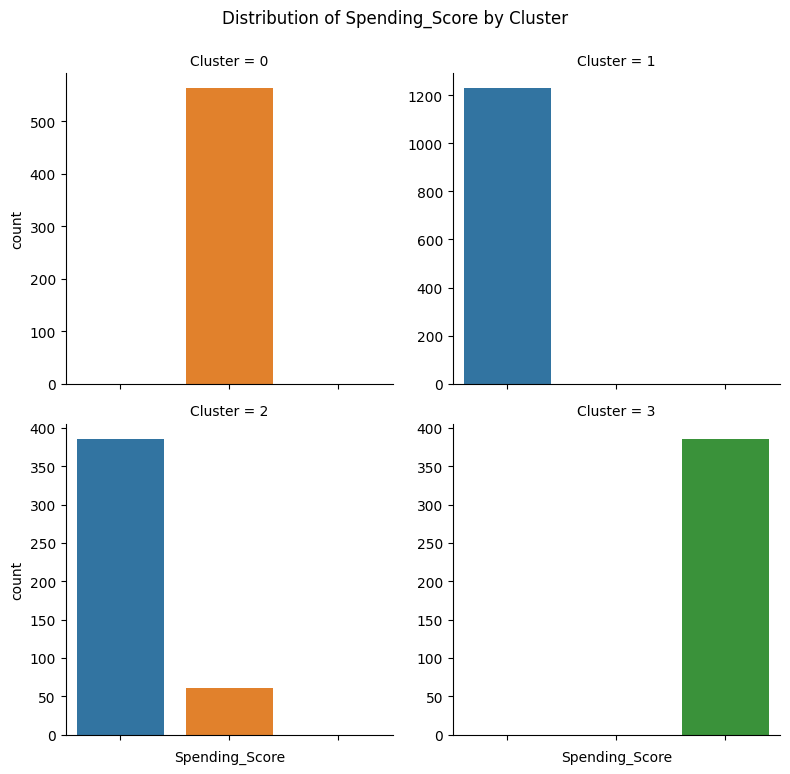

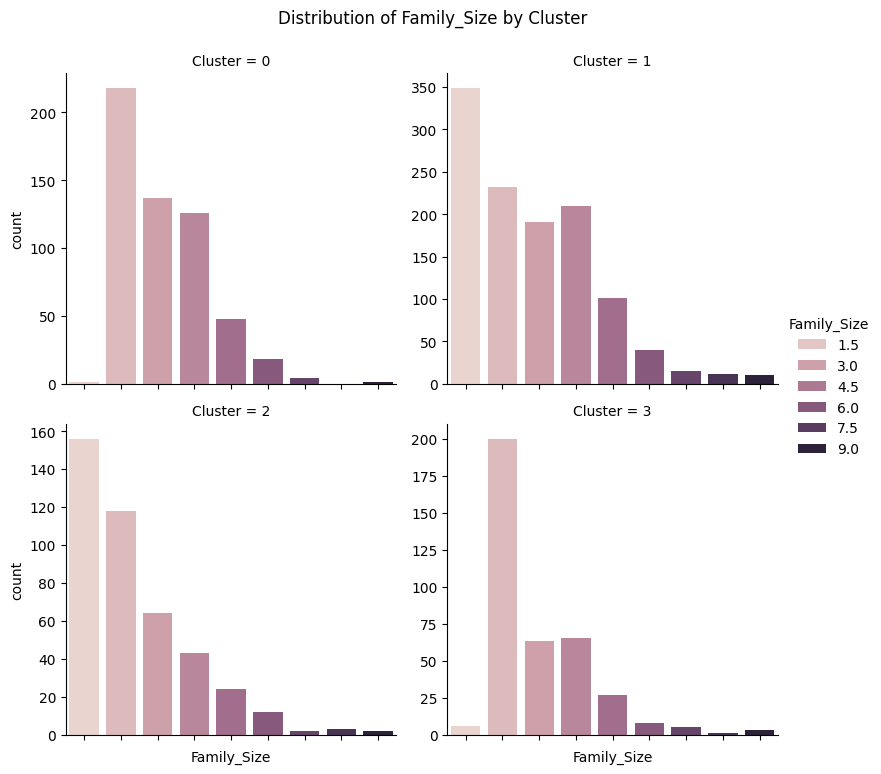

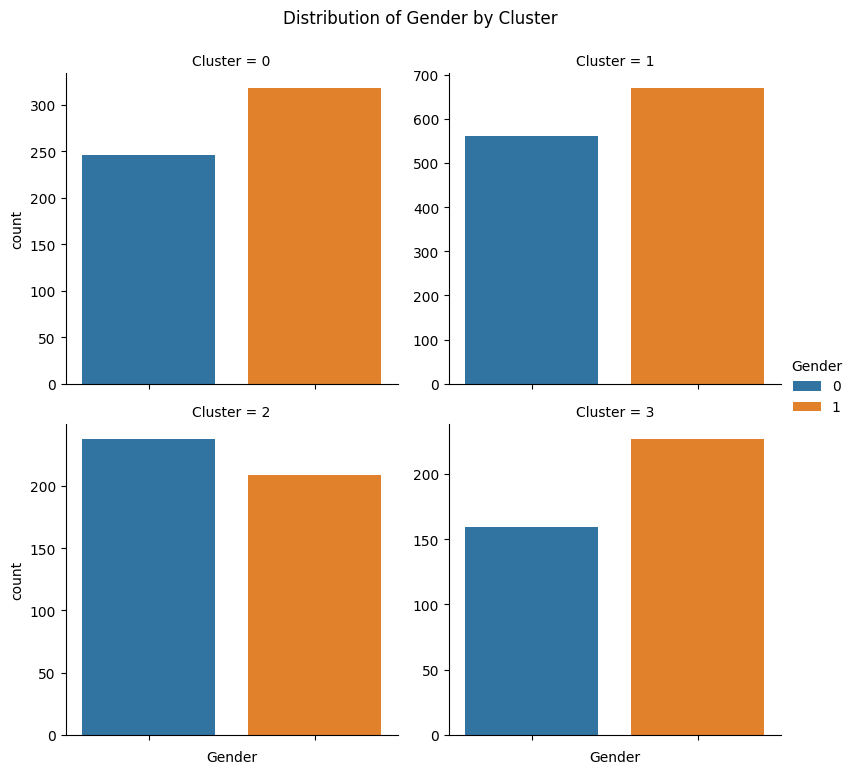

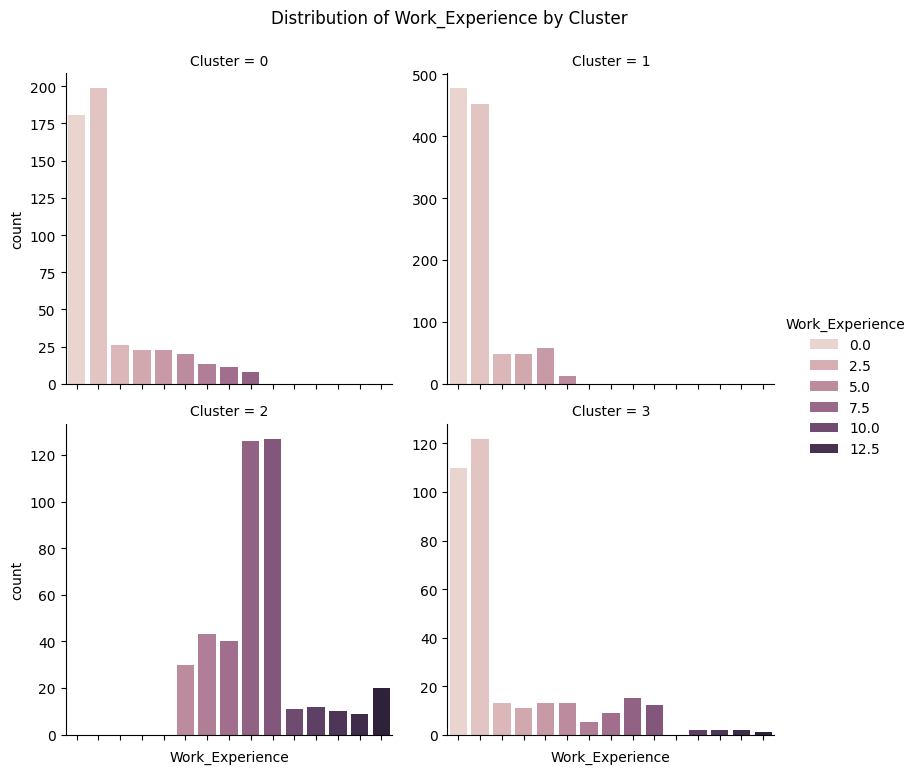

In [150]:
features_to_plot = ["Ever_Married", "Age", "Profession", "Spending_Score", "Family_Size", "Gender", "Work_Experience"]

for feature in features_to_plot:
    if feature in features_to_plot: 
        g = sns.catplot(x=feature, col="Cluster", col_wrap=2, hue = feature,
                        data=test_df, kind="count",
                        height=4, aspect=1, sharey=False)

        g.fig.subplots_adjust(top=0.9)
        g.fig.suptitle(f'Distribution of {feature} by Cluster')
        for ax in g.axes:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        plt.show()


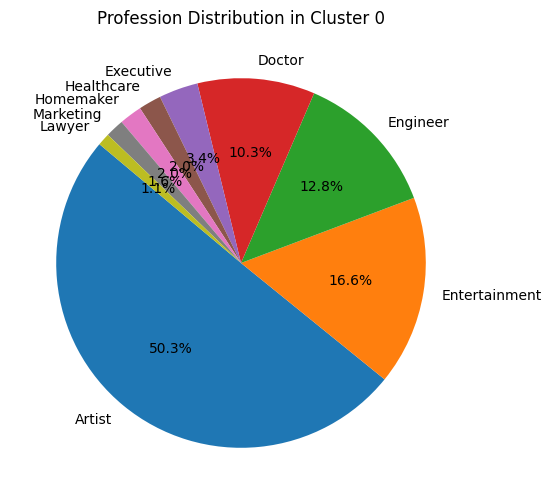

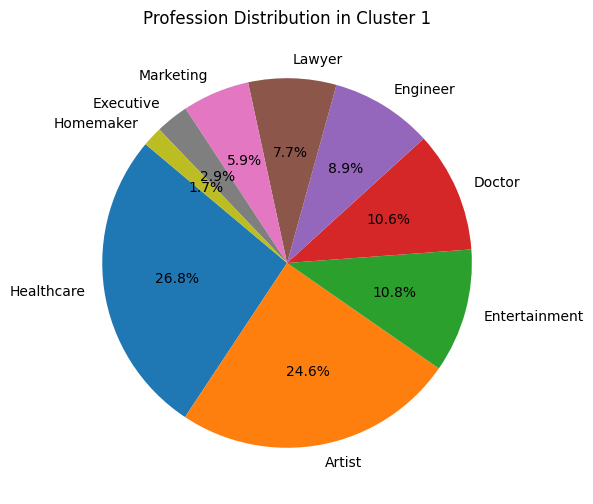

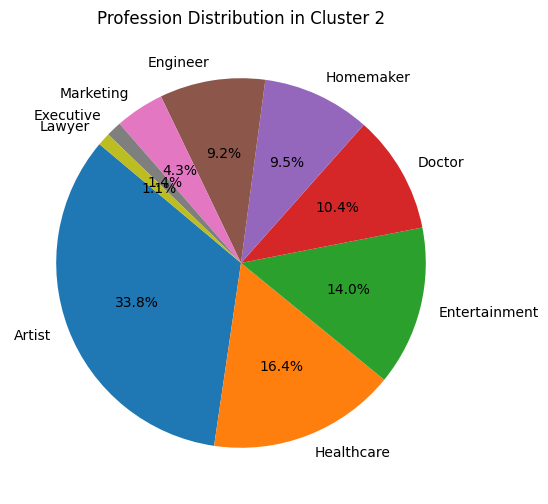

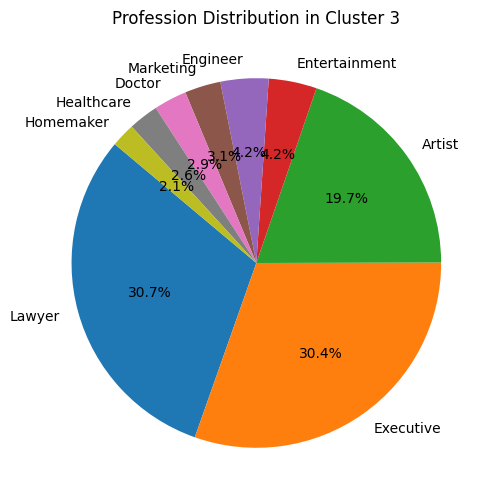

In [151]:
import matplotlib.pyplot as plt

n_clusters = test_df['Cluster'].nunique()

for i in range(n_clusters):
    cluster_data = test_df[test_df['Cluster'] == i]
 
    profession_counts = cluster_data['Profession'].value_counts()

    if profession_counts.empty:
        print(f"No data for Cluster {i}, skipping plot.")
        continue

    plt.figure(figsize=(6, 6))
    plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Profession Distribution in Cluster {i}')
    plt.show()


In [152]:
n_clusters

4

In [153]:
train_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,1,0.0,22,0.0,1.0,1.0,1,4.0,4.0,1
1,0,1.0,38,1.0,0.0,NaN,2,3.0,4.0,2
2,0,1.0,67,1.0,0.0,1.0,1,1.0,6.0,1
3,1,1.0,67,1.0,6.0,0.0,3,2.0,6.0,3
4,0,1.0,40,1.0,7.0,NaN,3,6.0,6.0,3


In [154]:
train_df_plot = train_df
train_df = pd.read_csv('Train.csv')


In [155]:
train_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


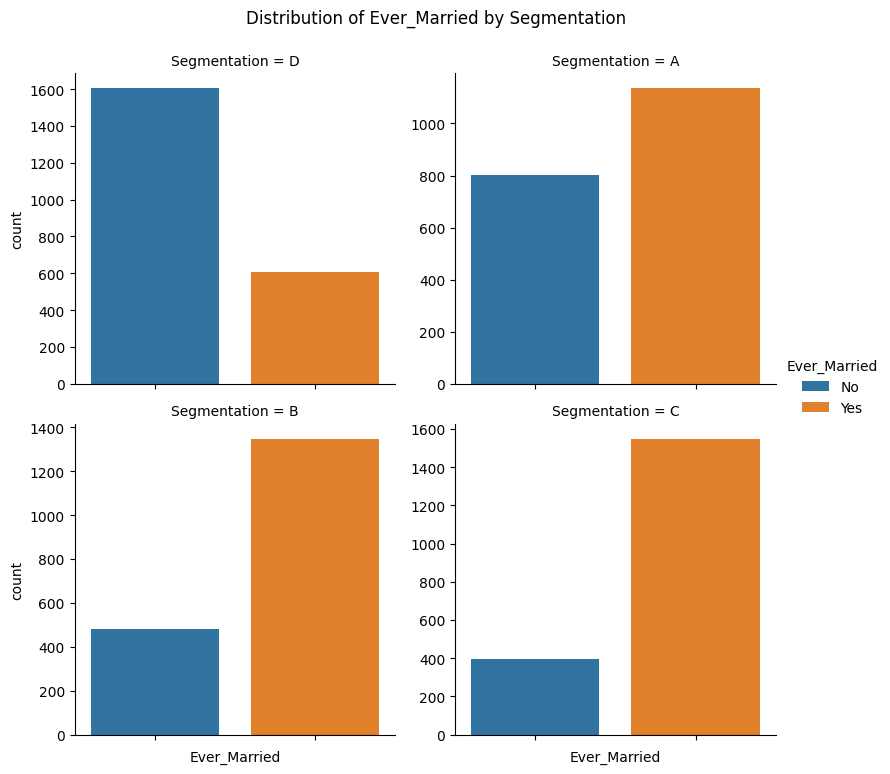

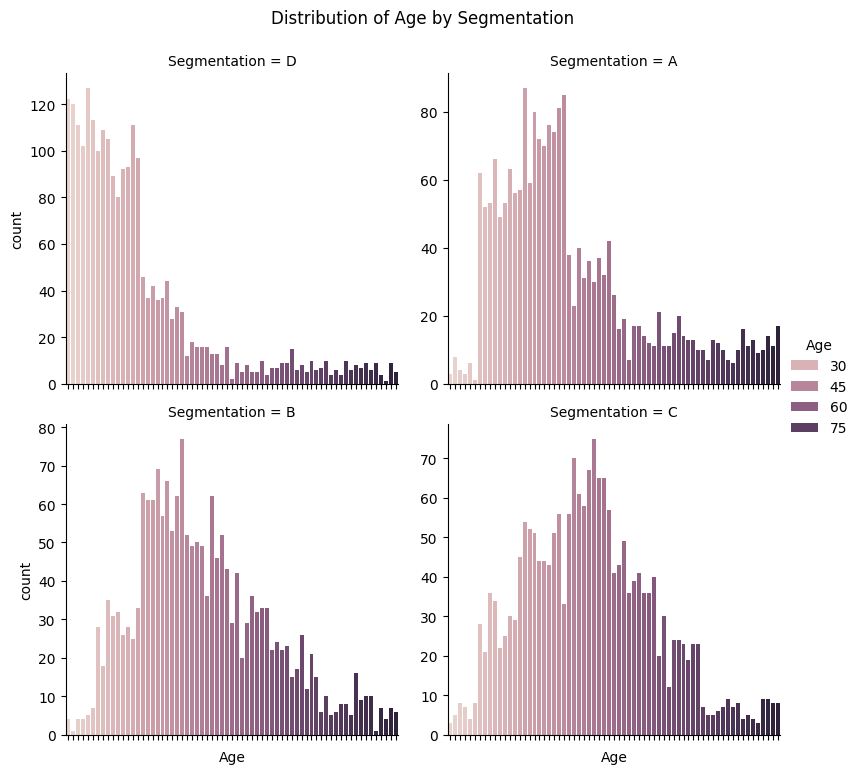

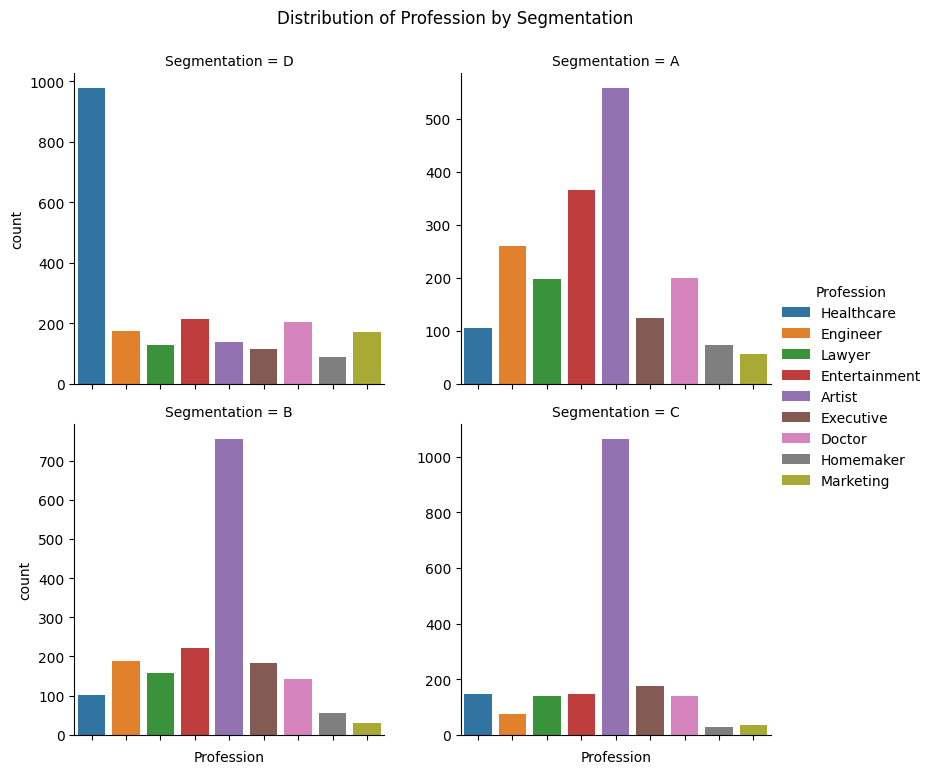

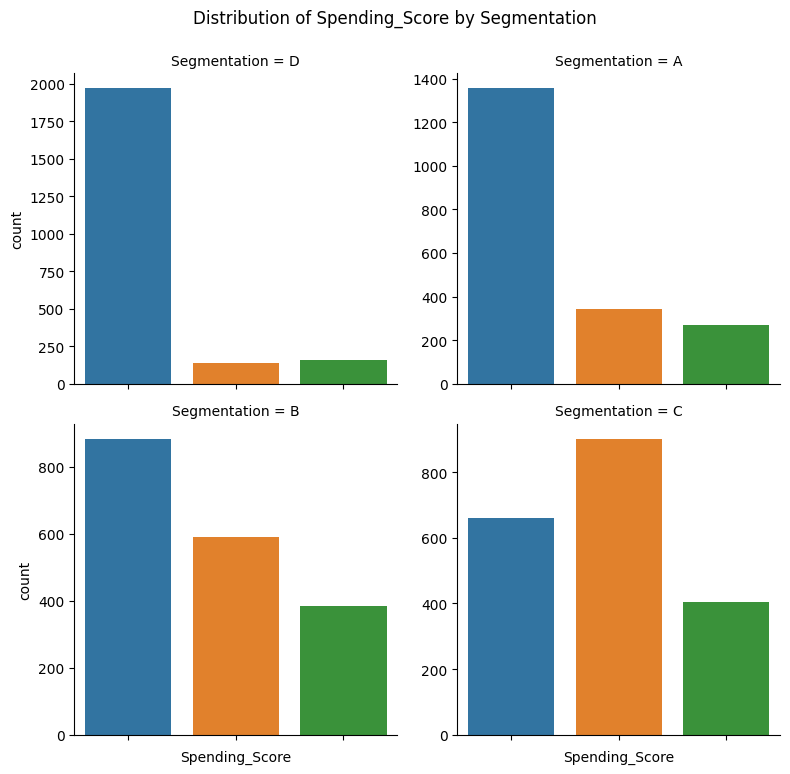

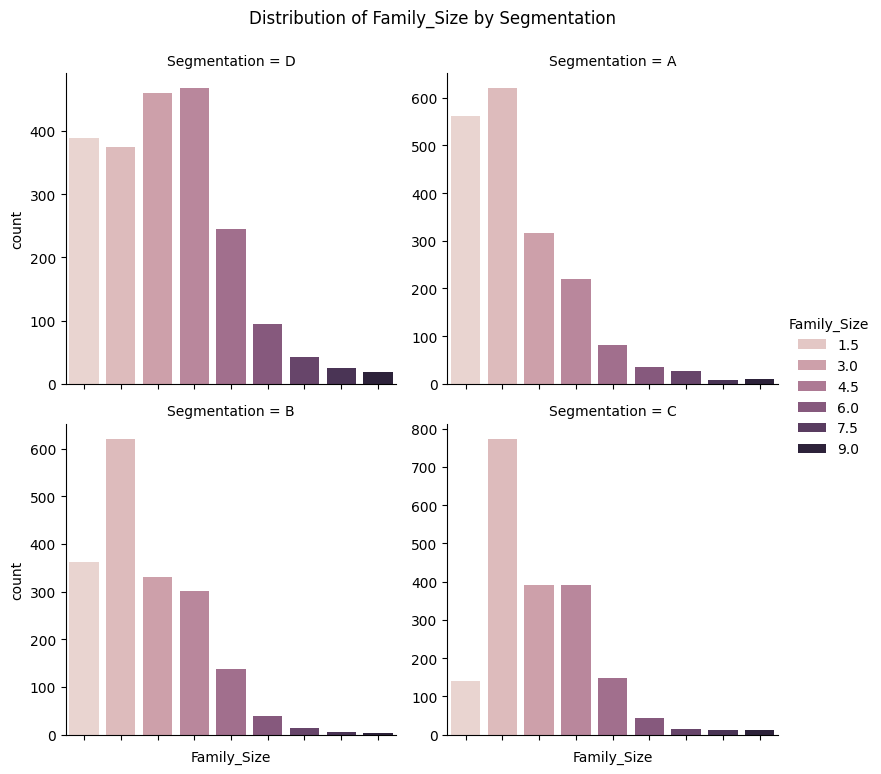

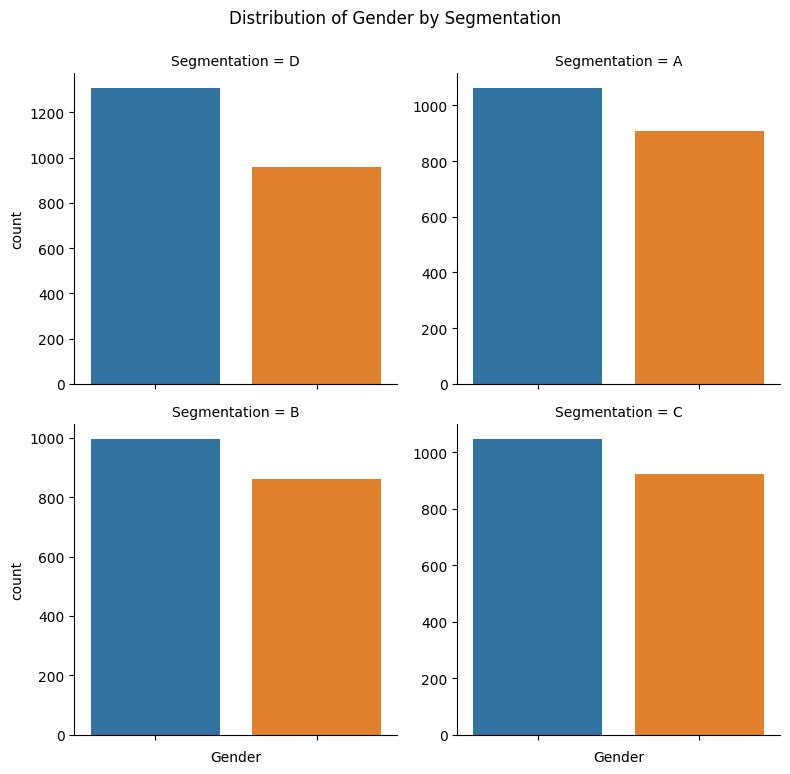

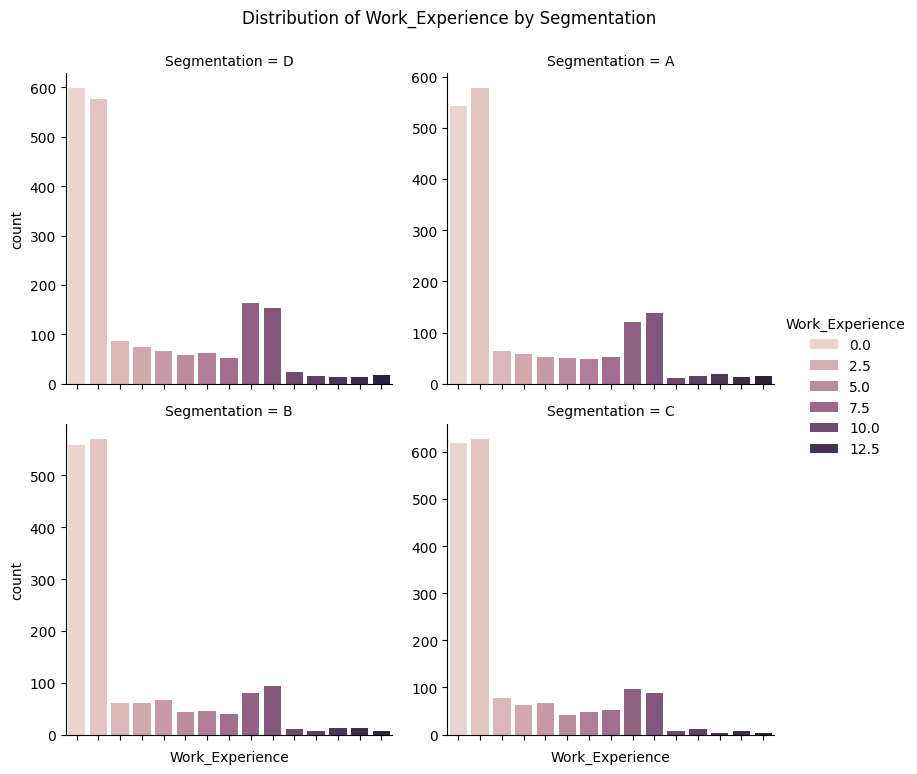

In [156]:
features_to_plot = ["Ever_Married", "Age", "Profession", "Spending_Score", "Family_Size", "Gender", "Work_Experience"]

for feature in features_to_plot:
    
    if feature in features_to_plot:  # edit this for other categorical features
        g = sns.catplot(x=feature, col="Segmentation", col_wrap=2, hue = feature,
                        data=train_df, kind="count",
                        height=4, aspect=1, sharey=False)

        g.fig.subplots_adjust(top=0.9)
        g.fig.suptitle(f'Distribution of {feature} by Segmentation')
        for ax in g.axes:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        plt.show()